<a href="https://colab.research.google.com/github/zoe-weinstein/ENVIR-458/blob/main/Homework7_Weinstein.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem 1: Logistic Regression with ROC Analysis (4 pts)

Dataset: Iris Dataset (Binary classification: Setosa vs. Non-Setosa)

Task: Perform logistic regression classification with the following analysis:

Load the Iris dataset from sklearn.datasets and convert it into a binary classification problem (Setosa vs. Non-Setosa).

Split your dataset into training (70%) and testing (30%) sets.

Train a logistic regression model.

Generate a confusion matrix and calculate accuracy, precision, recall, and F1-score.

Plot the ROC curve and compute the Area Under Curve (AUC).

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import auc

from sklearn.datasets import load_wine
from sklearn.svm import SVC




Load the Iris dataset from sklearn.datasets and convert it into a binary classification problem (Setosa vs. Non-Setosa).

In [58]:
# Load the data
X, y = load_iris(return_X_y=True)

Split your dataset into training (70%) and testing (30%) sets.

Train a logistic regression model.

In [59]:
# Setosa is 1, all others (Versicolor/Virginica) are 0
y = (y == 0).astype(int)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

# instantiate the model
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

y_pred = logreg.predict(X_test)

Generate a confusion matrix and calculate accuracy, precision, recall, and F1-score.


* Accuracy: Measures the proportion of correct predictions (both positive and negative) among all predictions. Calculated as (TP + TN) / (TP + TN + FP + FN).
* Precision: Measures the proportion of correct positive predictions in all positive predictions made. It is calculated as TP / (TP + FP).
* Recall (or Sensitivity): Measures the proportion of actual positives correctly identified. It is calculated as TP / (TP + FN).
* F1 Score: A harmonic mean of precision and recall, providing a balance between them. It is calculated as 2 * (Precision * Recall) / (Precision + Recall).

In [60]:
# Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix: {cnf_matrix}')

# Accuracy of Model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Precision
precision = metrics.precision_score(y_test, y_pred, average='weighted')
print(f'Precision: {precision}')

# Recall
recall = metrics.recall_score(y_test, y_pred, average='weighted')
print(f'Recall: {recall}')

# F_1
F_1 = metrics.f1_score(y_test, y_pred, average='weighted')
print(f'F1 Score: {F_1}')

Confusion Matrix: [[26  0]
 [ 0 19]]
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


Plot the ROC curve and compute the Area Under Curve (AUC).

AUC score:  1.0


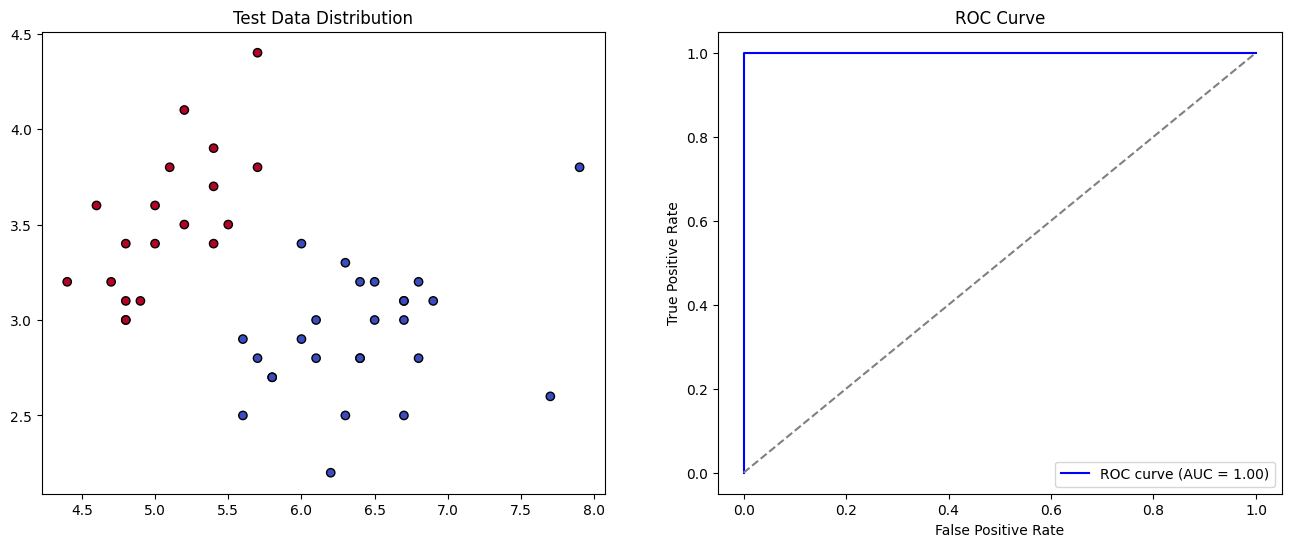

In [61]:

# Predict probabilities
y_proba = logreg.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc_score = roc_auc_score(y_test, y_proba)

print("AUC score: ", auc_score)
# Plot ROC curve
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Scatter plot of data
ax[0].scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm', edgecolors='k')
ax[0].set_title('Test Data Distribution')

# ROC Curve
ax[1].plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc_score:.2f})')
ax[1].plot([0, 1], [0, 1], linestyle='--', color='gray')
ax[1].set_xlabel('False Positive Rate')
ax[1].set_ylabel('True Positive Rate')
ax[1].set_title('ROC Curve')
ax[1].legend()

plt.show()

Becuase the AUC Score is a 1, this means it is a perfect classifier. As demonstrated by the False Positive and True Positive rate, there are no false positives and all true positives. This model having a perfect accuracy signals that it may be overfit, the model may have memorized the training data rather than generalizing. With the precision, Recall, and F1 Score = 1.0, suggest that the test data might be too similar to the training data, or the dataset is too small.

# Problem 2: SVM with Kernel Selection (6 pts)

Load the Wine dataset from sklearn.datasets.

In [62]:
X, y = load_wine(return_X_y=True)
X

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

Split the dataset into training (75%) and testing (25%) sets.

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

Train three SVM models, each using a different kernel (linear, RBF, and polynomial).

Evaluate the final performance of each model using accuracy, precision, recall, and F1-score.

### Linear

In [71]:
# Train SVM classifier
model = SVC(kernel='linear', C=10, probability=True)
model.fit(X_train, y_train)

# Predict probabilities
y_proba = model.predict_proba(X_test)[:, 1]

In [75]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc_score = roc_auc_score(y_test, y_proba)

ValueError: multiclass format is not supported

In [67]:
# Accuracy of Model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Precision
precision = metrics.precision_score(y_test, y_pred, average='weighted')
print(f'Precision: {precision}')

# Recall
recall = metrics.recall_score(y_test, y_pred, average='weighted')
print(f'Recall: {recall}')

# F_1
F_1 = metrics.f1_score(y_test, y_pred, average='weighted')
print(f'F1 Score: {F_1}')

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


### RBF

In [ ]:
# Train SVM classifier
model = SVC(kernel='rbf', C=10, probability=True)
model.fit(X_train, y_train)

# Predict probabilities
y_proba = model.predict_proba(X_test)[:, 1]

y_pred = model.predict(X_test)

In [ ]:
# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc_score = roc_auc_score(y_test, y_proba)

In [ ]:
# Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix: {cnf_matrix}')

# Accuracy of Model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Precision
precision = metrics.precision_score(y_test, y_pred, average='weighted')
print(f'Precision: {precision}')

# Recall
recall = metrics.recall_score(y_test, y_pred, average='weighted')
print(f'Recall: {recall}')

# F_1
F_1 = metrics.f1_score(y_test, y_pred, average='weighted')
print(f'F1 Score: {F_1}')

In [ ]:
# Train SVM classifier
model = SVC(kernel='poly', C=10, probability=True)
model.fit(X_train, y_train)

# Predict probabilities
y_proba = model.predict_proba(X_test)[:, 1]

y_pred = model.predict(X_test)

In [ ]:
# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc_score = roc_auc_score(y_test, y_proba)

In [ ]:
# Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix: {cnf_matrix}')

# Accuracy of Model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Precision
precision = metrics.precision_score(y_test, y_pred, average='weighted')
print(f'Precision: {precision}')

# Recall
recall = metrics.recall_score(y_test, y_pred, average='weighted')
print(f'Recall: {recall}')

# F_1
F_1 = metrics.f1_score(y_test, y_pred, average='weighted')
print(f'F1 Score: {F_1}')

Similar to in problem 1, the AUC Score is a 1, this means it is a perfect classifier. The False Positive is 0 and True Positive rate is 1. This means it has perfect accuracy. With the precision, Recall, and F1 Score = 1.0, suggest that the test data might be too similar to the training data, or the dataset is too small.